In [37]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np

import importlib

import src.src_state_prep_measurement

importlib.reload(src.src_state_prep_measurement)
from src.src_state_prep_measurement import StatePrepMeasurement, generate_state_prep_filename 

In [38]:
filename = generate_state_prep_filename('2025', '09', '23', '00', '17', '35')

filename = generate_state_prep_filename('2025', '09', '24', '15', '34', '43')


filename = generate_state_prep_filename('2025', '10', '01', '12', '40', '04')

num_particles = 4

measurement = StatePrepMeasurement(filename, num_particles)
measurement.acquire_data()



index:7
[0.003, 0.01, 0.003, 0.002, 0.011, 0.004, 0.004, 0.002, 0.002, 0.003, 0.005, 0.003, 0.007, 0.006, 0.004, 0.001, 0.007, 0.007, 0.003, 0.007, 0.003, 0.006, 0.003, 0.002, 0.005, 0.012, 0.003, 0.002, 0.004, 0.003, 0.001, 0.0, 0.005, 0.008, 0.009, 0.003, 0.006, 0.006, 0.005, 0.0, 0.007, 0.008, 0.004, 0.004, 0.008, 0.003, 0.005, 0.001, 0.006, 0.011, 0.007, 0.0, 0.004, 0.001, 0.008, 0.0, 0.009, 0.006, 0.01, 0.001, 0.002, 0.002, 0.001, 0.001, 0.004, 0.003, 0.007, 0.007, 0.012, 0.003, 0.002, 0.003, 0.006, 0.005, 0.005, 0.005, 0.003, 0.005, 0.004, 0.003, 0.006, 0.01, 0.008, 0.005, 0.003, 0.001, 0.001, 0.003, 0.0, 0.002, 0.004, 0.001, 0.003, 0.001, 0.001, 0.001, 0.006, 0.004, 0.004, 0.011, 0.005, 0.005, 0.003, 0.001, 0.012, 0.005, 0.006, 0.002, 0.002, 0.002, 0.002, 0.0, 0.004, 0.005, 0.003, 0.001, 0.003, 0.001, 0.004, 0.001, 0.002, 0.004, 0.003, 0.001, 0.001, 0.0, 0.0, 0.0, 0.009, 0.005, 0.006, 0.005, 0.003, 0.006, 0.005, 0.004, 0.008, 0.009, 0.006, 0.004, 0.003, 0.006, 0.003, 0.003, 0.01

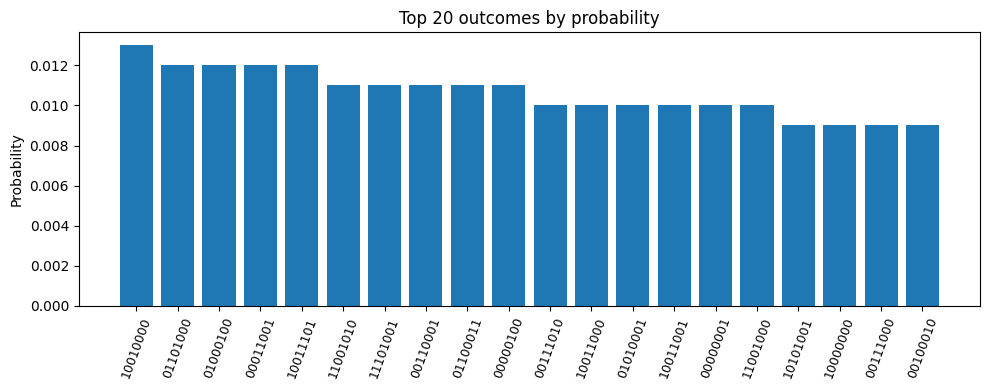

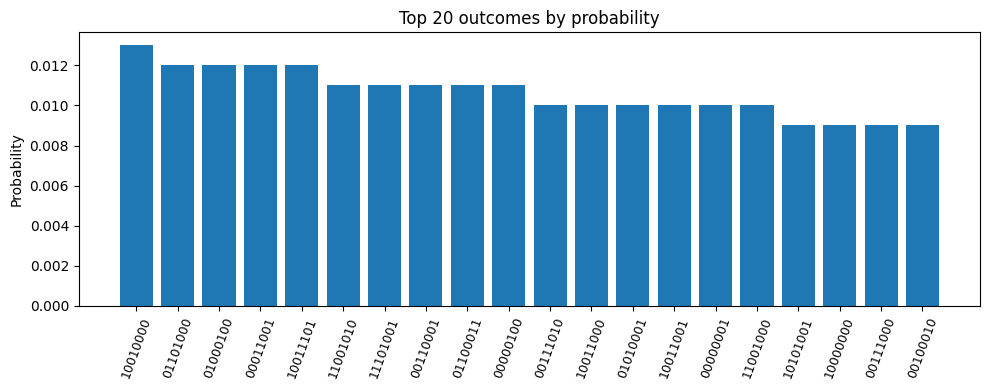

c:\Users\mattm\OneDrive\Desktop\Research\Projects\Triangle Lattice\Jupyter Notebooks\8Q_Triangle_Lattice_v1\state_prep_measurements\src\src_state_prep_measurement.py:234: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  times = f['expt_samples'][()]


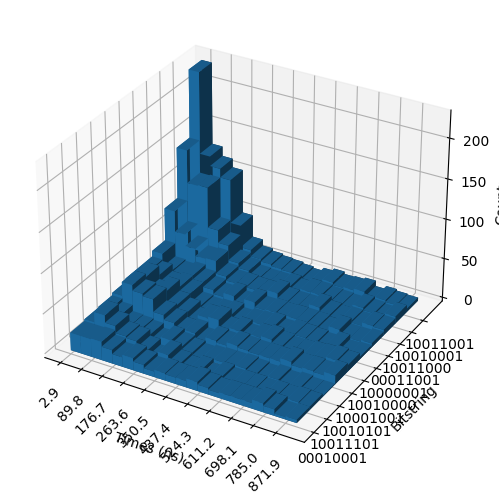

In [39]:
counts = measurement.counts

samples = 1050

index = measurement.samples_to_index(samples)
print(f'index:{index}')

counts_index = counts[:,index]

print(list(counts_index/np.sum(counts_index)))

measurement.plot_state_index(index)
measurement.plot_state_samples(1050)

# measurement.plot_states()
# measurement.plot_states_subset(subset_bitstrings=['00000000', '11111111', '10101010', '01010101'])

reference_time = 580  # in ns
reference_time = 0  # in ns
measurement.plot_states_reference(reference_time=reference_time, subset_size=10)

In [44]:
counts_post_selected = measurement.get_counts_post_selected()

samples = 1050

index = measurement.samples_to_index(samples)
print(f'index:{index}')

counts_index = counts_post_selected[:,index]

print(list(counts_index/np.sum(counts_index)))

index:7
[0.003257328990228013, 0.006514657980456026, 0.006514657980456026, 0.009771986970684038, 0.003257328990228013, 0.0, 0.013029315960912053, 0.009771986970684038, 0.016286644951140065, 0.0, 0.003257328990228013, 0.026058631921824105, 0.019543973941368076, 0.03257328990228013, 0.006514657980456026, 0.009771986970684038, 0.016286644951140065, 0.016286644951140065, 0.013029315960912053, 0.016286644951140065, 0.003257328990228013, 0.003257328990228013, 0.006514657980456026, 0.013029315960912053, 0.009771986970684038, 0.035830618892508145, 0.016286644951140065, 0.009771986970684038, 0.016286644951140065, 0.019543973941368076, 0.006514657980456026, 0.016286644951140065, 0.009771986970684038, 0.009771986970684038, 0.006514657980456026, 0.013029315960912053, 0.013029315960912053, 0.019543973941368076, 0.009771986970684038, 0.02280130293159609, 0.02280130293159609, 0.013029315960912053, 0.03257328990228013, 0.019543973941368076, 0.016286644951140065, 0.009771986970684038, 0.009771986970684

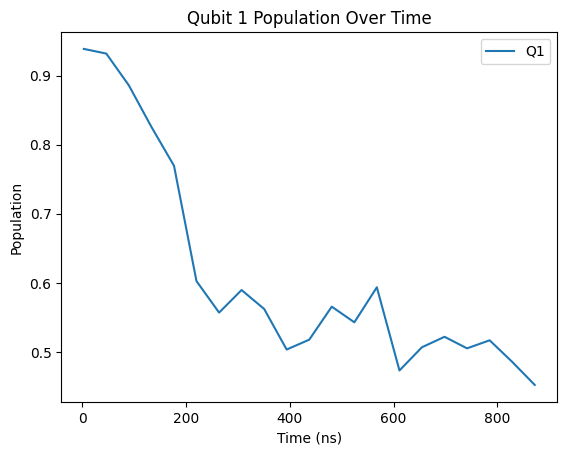

In [43]:


num_qubits = measurement.num_qubits
times = measurement.get_times()

bitstrings = measurement.generate_bitstrings()
bitstrings_post_selected = measurement.get_bitstrings_post_selected()

counts_post_selected = measurement.get_counts_post_selected()
probabilities_post_selected = measurement.get_probabilities_post_selected()


populations = np.zeros((num_qubits, len(times)))

num_particles = 4
for i in range(len(bitstrings_post_selected)):
    bitstring = bitstrings_post_selected[i]
    for j in range(num_qubits):
        if bitstring[j] == 1:
            for k in range(len(times)):
                populations[j, k] += probabilities_post_selected[i,k]

plt.plot(times, populations[0,:], label='Q1')
plt.xlabel('Time (ns)')
plt.ylabel('Population')
plt.title('Qubit 1 Population Over Time')
plt.legend()
plt.show()